**DEEP LEARNING COURSE PROJECT - IMAGE CLASSIFICATION**

**A GANESH AADHITHYA**

SCDS

email: ganeshaadhithya.a-26@scds.saiuniversity.edu.in

Dataset: Airplanes, Motorbikes & Schooners


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.15.0


#Data Preprocessing


##Original DataSet
Total Number of Images in the Dataset: 1661

Number of Images present per class:-

Motorbikes: 798

Airplanes: 800

Schooner: 63

##New Dataset
Subsetting Method for the new dataset

Total no.of images: 613 out of 1661

No.of Images from airplanes class: 275 out of 800

No.of Images from Motorbikes class: 275 out of 798

No.of Images from schooner class: 63 out of 63

In [ ]:
# from drive
imgFiles = glob.glob("/content/drive/MyDrive/Airplanes_Motorbikes_Schooners_1/*/*.jpg")

In [ ]:
for items in imgFiles[:10]:
  print(items)

/content/drive/MyDrive/Airplanes_Motorbikes_Schooners_1/airplanes/Copy of image_0002.jpg
/content/drive/MyDrive/Airplanes_Motorbikes_Schooners_1/airplanes/Copy of image_0001.jpg
/content/drive/MyDrive/Airplanes_Motorbikes_Schooners_1/airplanes/Copy of image_0010.jpg
/content/drive/MyDrive/Airplanes_Motorbikes_Schooners_1/airplanes/Copy of image_0006.jpg
/content/drive/MyDrive/Airplanes_Motorbikes_Schooners_1/airplanes/Copy of image_0004.jpg
/content/drive/MyDrive/Airplanes_Motorbikes_Schooners_1/airplanes/Copy of image_0007.jpg
/content/drive/MyDrive/Airplanes_Motorbikes_Schooners_1/airplanes/Copy of image_0008.jpg
/content/drive/MyDrive/Airplanes_Motorbikes_Schooners_1/airplanes/Copy of image_0009.jpg
/content/drive/MyDrive/Airplanes_Motorbikes_Schooners_1/airplanes/Copy of image_0003.jpg
/content/drive/MyDrive/Airplanes_Motorbikes_Schooners_1/airplanes/Copy of image_0005.jpg


In [ ]:
print(len(imgFiles))

613


##Preparing the Dataset

In [ ]:
X = []
y = []

for fName in imgFiles:

  # Preparing the dataset and populating X and y
  X_i = Image.open(fName)
  X_i = X_i.resize((299,299))
  if X_i.mode != 'RGB':
    X_i = X_i.convert('RGB')
  X_i = np.array(X_i) / 255.0

  X.append(X_i)

  label = fName.split("/")
  y_i = label[-2]

  y.append(y_i)

In [ ]:
for class_label in set(y):
    count = 0
    for image_label in y:
        if class_label == image_label:
            count += 1
    print(f"The number of images in {class_label} class are: {count}")

The number of images in airplanes class are: 275
The number of images in Motorbikes class are: 275
The number of images in schooner class are: 63


In [ ]:
from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)

print(set(y))
print(lEncoder.classes_)

X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

{0, 1, 2}
['Motorbikes' 'airplanes' 'schooner']
(613, 299, 299, 3)
(613,)


In [ ]:
# Spliting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify=y, random_state=42)

# Normalizing with mean and standard deviation
mu = X_train.mean()
std = X_train.std()
X_train_std = (X_train - mu) / std
X_test_std = (X_test - mu) / std
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (459, 299, 299, 3)
X_test_std_shape: (154, 299, 299, 3)


#Dataset Details
a. Total number of images in the dataset - 613


b. Number of images present per class-

 The number of images in airplanes class are:275

 The number of images in Motorbikes class are:275

 The number of images in schooner class are:63


c. Total number of images used for training and testing- X_train = 459,
                                                         X_test =  154

#Model1_TransferLearning - Xception

91884032/91884032 [==============================] - 1s 0us/step


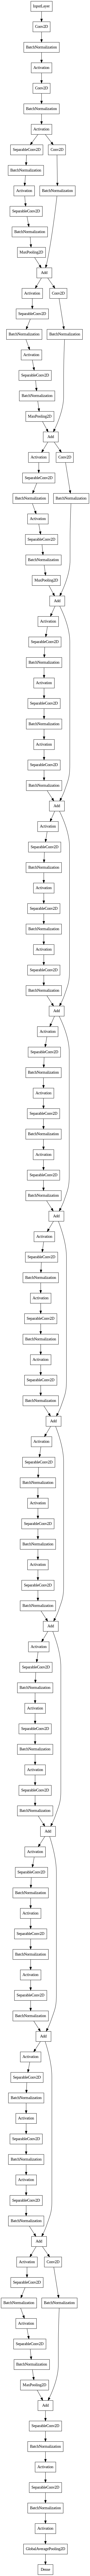

In [ ]:
# Retrieveing the Xception model
Xception_model = keras.applications.xception.Xception()
#Visualizing the model
tf.keras.utils.plot_model(
    Xception_model,
    to_file='Xmodel.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

83683744/83683744 [==============================] - 1s 0us/step


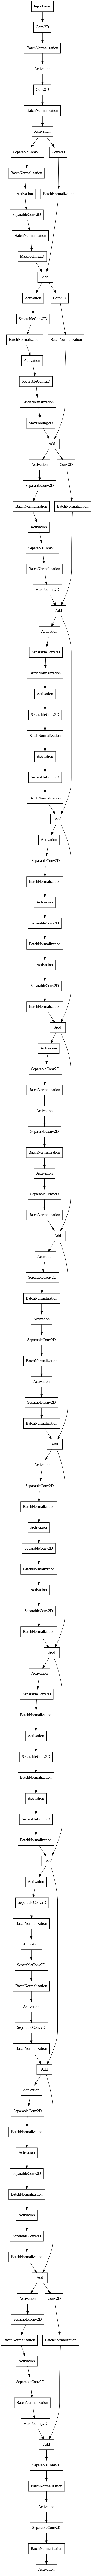

In [ ]:
# Taking only the feature extractor part
base_model = keras.applications.xception.Xception(weights='imagenet',
                                                  include_top=False)
# Visualizing the extractor part for transfer learning
tf.keras.utils.plot_model(
    base_model,
    to_file='baseModel.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [ ]:
# Freezing the weights - will not be updated during backpropagation
for layer in base_model.layers:
  layer.trainabe = False

In [ ]:
#Adding the classifier part to the model
global_pooling = keras.layers.GlobalAveragePooling2D()(base_model.output)
batch_norm = keras.layers.BatchNormalization()(global_pooling)
drop_layer = keras.layers.Dropout(0.25)(batch_norm)
output_ = keras.layers.Dense(units=3, activation='softmax')(drop_layer)

model1_TL = keras.models.Model(inputs=[base_model.input], outputs=[output_])

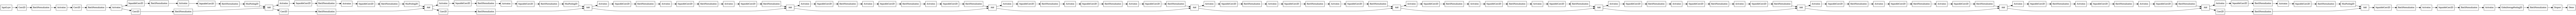

In [ ]:
# Visualizing the complete model
tf.keras.utils.plot_model(
    model1_TL,
    to_file='model1_TL.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

In [ ]:
model1_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_TL = [
             keras.callbacks.ModelCheckpoint("bestTL.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history_TL = model1_TL.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks_TL)

Epoch 1/10
26/26 [==============================] - 59s 890ms/step - loss: 0.3273 - accuracy: 0.9249 - val_loss: 0.2422 - val_accuracy: 0.9130
Epoch 2/10
26/26 [==============================] - 11s 425ms/step - loss: 0.1610 - accuracy: 0.9564 - val_loss: 0.6328 - val_accuracy: 0.8043
Epoch 3/10
26/26 [==============================] - 11s 433ms/step - loss: 0.1296 - accuracy: 0.9564 - val_loss: 0.0584 - val_accuracy: 0.9783
Epoch 4/10
26/26 [==============================] - 12s 453ms/step - loss: 0.0651 - accuracy: 0.9831 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 5/10
26/26 [==============================] - 11s 437ms/step - loss: 0.0413 - accuracy: 0.9806 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 6/10
26/26 [==============================] - 11s 443ms/step - loss: 0.0118 - accuracy: 0.9952 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 7/10
26/26 [==============================] - 12s 445ms/step - loss: 0.0272 - accuracy: 0.9927 - val_loss: 0.0328 - val_accuracy: 1.0000

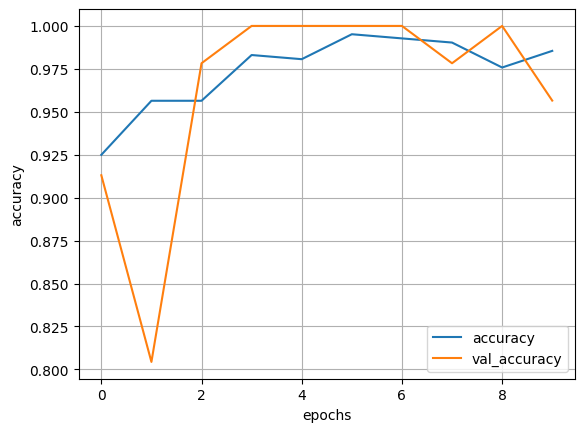

In [ ]:
#Accuracy plot for the model
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_TL.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
testLoss_TL, testAccuracy_TL = model1_TL.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

5/5 [==============================] - 11s 1s/step - loss: 0.0602 - accuracy: 0.9870
Test-loss: 0.060199, Test-accuracy: 0.987013


In [ ]:
model1_TL.load_weights("bestTL.h5")
testLoss_TL, testAccuracy_TL = model1_TL.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

5/5 [==============================] - 1s 217ms/step - loss: 0.0228 - accuracy: 1.0000
Test-loss: 0.022774, Test-accuracy: 1.000000


In [ ]:
y_proba = model1_TL.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

5/5 [==============================] - 2s 230ms/step
[2 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1
 1 0 1 0 1 2 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 2 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 2 2 0 0 1 0 0 0 0 1 2 0 1 1 1 1 1 0 2 2 1 1 0 1 0 1
 0 1 0 1 1 0 1 0 2 1 2 0 0 0 0 0 0 0 1 1 1 1 0 2 2 1 0 1 0 2 2 1 2 1 1 0 0
 0 1 2 1 0 0]


In [ ]:
#Confusion Matrix for Model1_TL
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[69,  0,  0],
       [ 0, 69,  0],
       [ 0,  0, 16]])

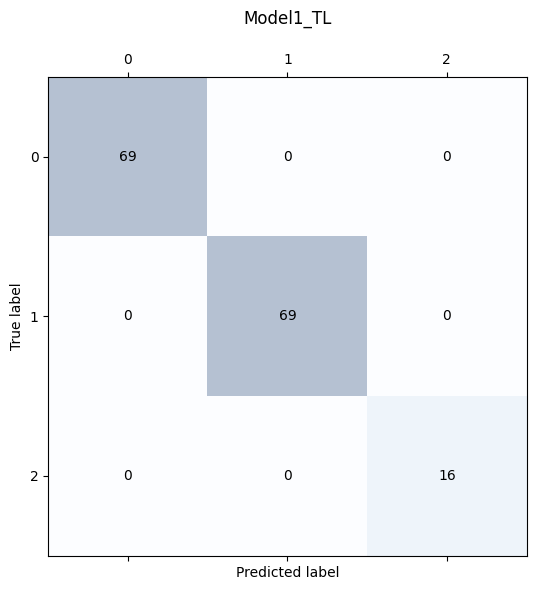

{0, 1, 2}
['Motorbikes' 'airplanes' 'schooner']


In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('Model1_TL\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix_Model1_TL.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

print(set(y))
print(lEncoder.classes_)

In [ ]:
#Saving the best model
model1_TL.save('/content/drive/MyDrive/Models/01_Xception_TransferLearning_Best_Model.h5')
print("Model saved as '01_Xception_TransferLearning_Best_Model.h5'")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as '01_Xception_TransferLearning_Best_Model.h5'


In [ ]:
from numpy import save

save('/content/drive/MyDrive/Models/X_train_std.npy', X_train_std)
save('/content/drive/MyDrive/Models/X_test_std.npy', X_test_std)

save('/content/drive/MyDrive/Models/y_train.npy', y_train)
save('/content/drive/MyDrive/Models/y_test.npy', y_test)